## Multiple Linear Regression
- One Target with Multiple Predictors

$ y ~ x1, x2, x3, ... , xn $

$ y = B_0 + B_1*x1 + B_2*x2 + ..... + B_n*xn $

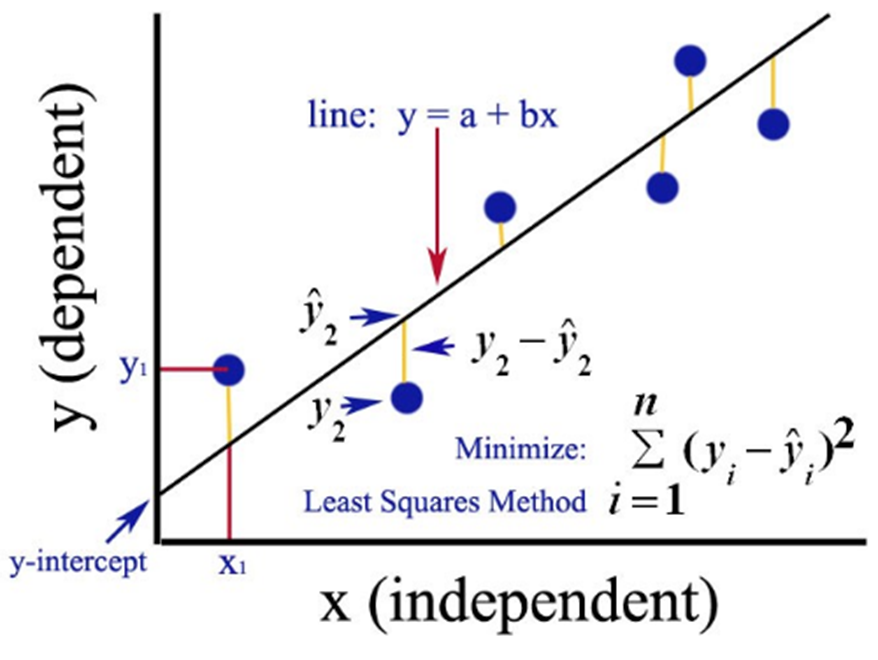

In [3]:
# Ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

Read the training Data

In [4]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Target feature is PROFIT

$ PROFIT ~ RND, ADMIN, MKT $

$ PROFIT_pred = B0 + B1 * RND + B2*ADMIN + B3 * MKT $

## Step 2 - Perform Basic Data Quality Checks

In [16]:
# Check missing values in DataFrame
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [9]:
#Check duplicates in data frames
df.duplicated().sum()

np.int64(0)

In [10]:
# Show info of DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Step 3 - Visualize the data

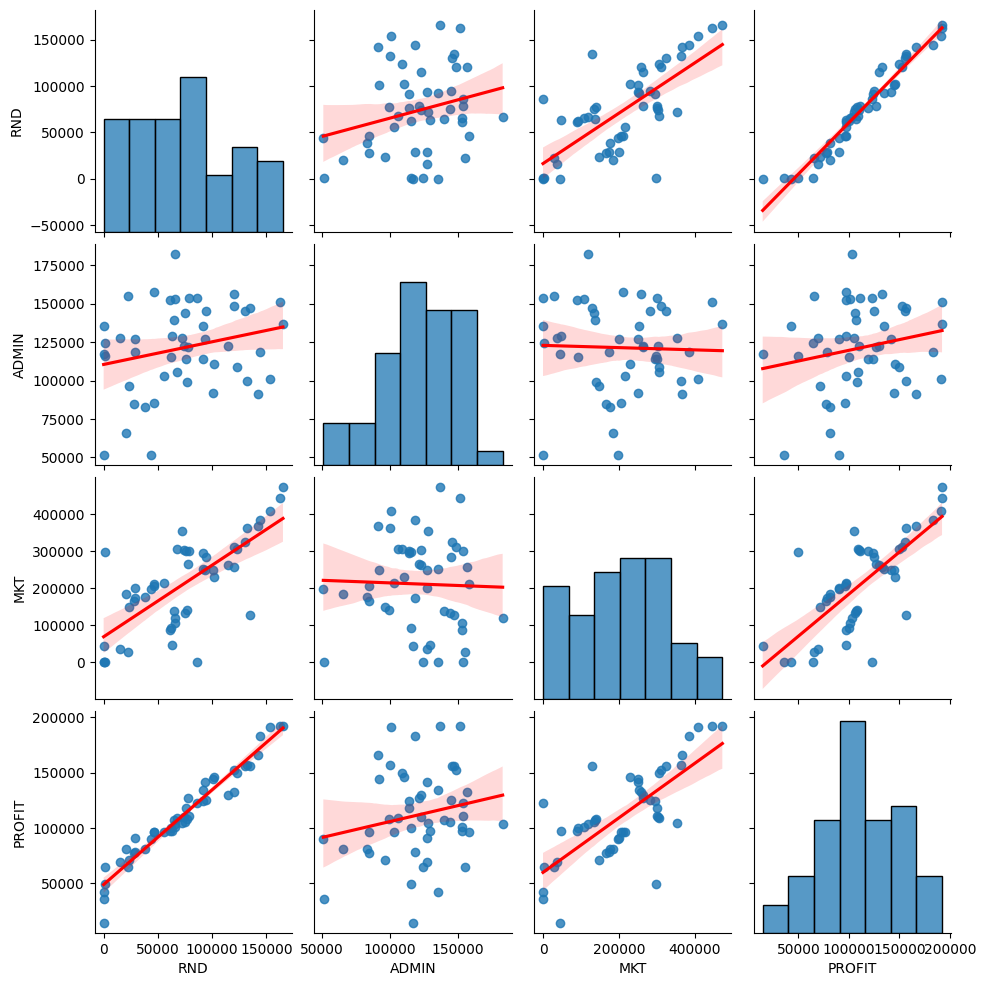

In [15]:
import seaborn as sns

sns.pairplot(df, kind="reg", plot_kws={"line_kws" : {"color" : "red"}})

In [12]:
corr = df.corr(numeric_only=True)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<Axes: >

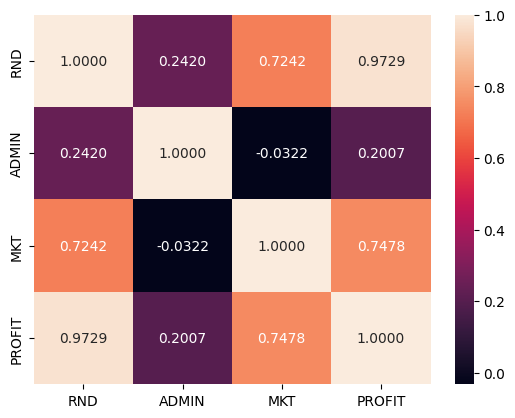

In [14]:
sns.heatmap(data=corr, annot=True, fmt=".4f")

## Step 4 - Separate X and Y (Profit)

PROFIT ~ RND, MKT, ADMIN 

In [17]:
X = df.drop(columns = ["STATE", "PROFIT"])
Y = df[["PROFIT"]]

In [18]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [19]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step 5 - Build the model

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
model.intercept_

array([50122.19298987])

In [22]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [23]:
model.coef_[0]

array([ 0.80571505, -0.02681597,  0.02722806])

In [24]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [25]:
coefs = pd.Series(model.coef_[0], index=X.columns)
coefs

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: >

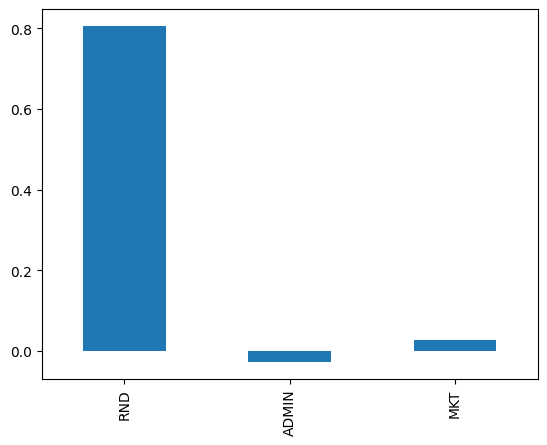

In [26]:
coefs.plot(kind="bar")

$ PROFITpred = 50122.19 + 0.8057 * RND - 0.0268 * ADMIN + 0.0272 * MKT $

In [27]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [28]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step 6 - Evaluate the model

1. Root Mean Squared Error (RMSE)
2. Mean Absolute Error (MAE)
3. Mean Absolute Percentage Error (MAPE)
4. R2 Score

In [29]:
# r2 score on train
model.score(X, Y)

0.9507459940683246

In [30]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [31]:
def evaluate_model(model, x, y):
    ypred =model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [32]:
evaluate_model(model, X, Y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 : 95.07%


## If R2 score is greater than 80% then model is good

## Step 7 - Perform out of sample prediction

In [33]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [34]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [35]:
def predict_profit(model, rnd, admin, mkt):
    xnew = [[rnd, admin, mkt]]
    ypred = model.predict(xnew)
    return ypred

In [38]:
predict_profit(model, rnd=1_00_000, admin=50_000,mkt=30_000)

array([[130169.74150573]])

In [37]:
predict_profit(model, rnd=2_00_000, admin=1_00_000, mkt=50_000)

array([[209945.00937358]])

In [39]:
predict_profit(model, rnd=10_000, admin=30_000, mkt = 15_000)

array([[57783.28540919]])